# Some Statistical Inference

In [52]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import sys

In [53]:
df = pd.read_csv("ZomatoDataExtractingAndCleaning/zomato_clean_data_csv/zomato_clean_data.csv")

df.index = df["restaurant_ID"]
df.drop(["restaurant_ID"],axis=1,inplace=True)

plt.style.use('ggplot')

Index(['restaurant_link', 'restaurant_name', 'locality', 'restaurant_category',
       'zomato_gold', 'discounts', 'photos_taken', 'rating', 'votes',
       'cuisines', 'approx_cost_for_2', 'opening_timings', 'address',
       'latitude', 'longitude', 'more_info', 'featured_in', 'known_for',
       'most_liked_Food', 'most_liked_Service', 'most_liked_Look & Feel',
       'reviews'],
      dtype='object')

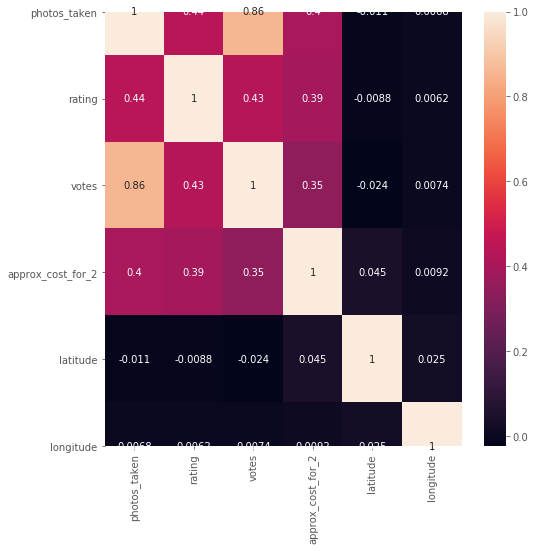

In [54]:
#getting correlations in different variables 
corr = df.corr(method='pearson')
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
df.columns

In [34]:
#Null hypothesis test to verify the statistical significance of correlation coeficient between photos_taken and votes


We see a strong positive correlation between photos taken and votes.To see how statistically significant corelation is on the population lets take samples and conduct statistical significance test.Lets do a Null hypothesis to test the significance.

H0= Null hypothesis: The correlation coeff = 0 that is, there is no correlation between votes and photos taken.
H1= Alternative hypothesis: The correlation coeff > 0 which means votes and photos taken are positively correlated.


In [55]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [56]:

photos_arr = df['photos_taken'].replace(np.nan, 0).values
votes_arr = df['votes'].replace(np.nan, 0).values

perm_replicates = np.empty(len(photos_arr))
r_obs = pearson_r(photos_arr,votes_arr)


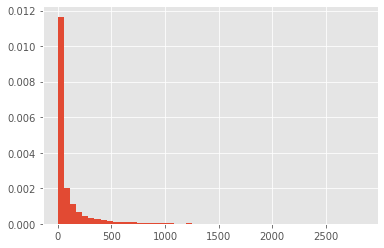

In [57]:
#Getting sampling distribution of person coeff for a 1000 samples

for i in range(1000):
    photos_arr_permuted = np.random.permutation(photos_arr)
    perm_replicates[i] = pearson_r(photos_arr_permuted, votes_arr)
    #Compute p-value: p
    p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)

#plotting the replicates
_ = plt.hist(perm_replicates,bins=50, density=True)
plt.show()

Since the pvalue = 0.70,which means there 70% chance of getting the correlation coefficient extreme as the observed correation coefficient which is 0.86,which implies we can reject the null hypothesis.

In [58]:
#Null hypothesis test to verify the statistical significance of zomato gold rating over non zomato gold rating of restaurants

H0= Null hypothesis: The rating of zomato gold is same as a non zomato gold restaurant 
H1= Alternative hypothesis: The rating of zomato gold is greater than a non zomato gold rating.

In [59]:
df.dropna(subset=["rating"],inplace=True)

df['zomato_gold'].fillna('No zomato gold', inplace=True)
grouped = df.groupby('zomato_gold')
groupA = grouped.get_group('zomato gold')
groupB = grouped.get_group('No zomato gold')

obs = np.mean(groupA['rating'])-np.mean(groupB['rating'])
obs

0.3706018814115044

We see a difference of 0.37 in the ratings of a zomato gold and non zomato gold rating which is the observed difference.Let difference in mean be the test statistic. 

In [60]:
sampleSize = 300
samplesA = np.empty(1000)
samplesB = np.empty(1000)
diffSamples = np.empty(1000)
                    
for i in range(1000):
    a = np.random.choice(groupA['rating'], sampleSize, replace=True)
    samplesA[i] = np.mean(a)
    
    b = np.random.choice(groupB['rating'], sampleSize, replace=True)
    samplesB[i] = np.mean(b)
    
    diffSamples = samplesA[i] - samplesB[i]


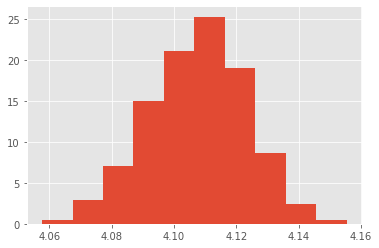

In [61]:
_ = plt.hist(samplesA,bins=10, density=True)

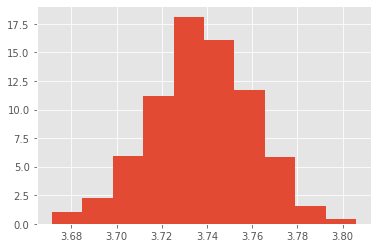

In [62]:
_ = plt.hist(samplesB,bins=10, density=True)

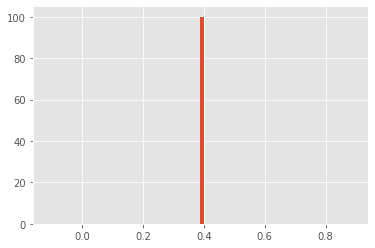

In [63]:
_ = plt.hist(diffSamples,bins=100, density=True)

In [64]:
pval = np.sum(diffSamples >= obs) / sampleSize
pval

0.0033333333333333335

A pval of 0.003 which is 0.3% of probability that we get difference in the ratings as extreme as the observed difference under the assumption that the null hypothesis is true.so we reject the null hypothesis. 